# Sliding Window Cross Validation 
## Define fixed Dataset K_fold split for each trial: 

In [13]:
import sys
import os
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from high_level_DL_method import load_optimizer_and_scheduler
from dl_models.full_model import full_model
from trainer import Trainer
from examples.train_model_on_k_fold_validation import load_configuration
from K_fold_validation.K_fold_validation import KFoldSplitter
import numpy as np 
#trial_id = 'subway_in_STGCN_MSELoss_2025_01_20_14_27_20569'
trial_id = 'subway_in_subway_out_calendar_STGformer_MSELoss_2025_05_03_04_19_34322'
#trial_id = 'subway_in_calendar_netmob_POIs_STAEformer_HuberLossLoss_2025_06_11_21_33_4901'
args,_ = load_configuration(trial_id,load_config=True)
if not hasattr(args,'horizon_step'):
    args.horizon_step = 1
args.K_fold = 2

folds =  list(np.arange(args.K_fold))
K_fold_splitter = KFoldSplitter(args,folds)
K_subway_ds,args = K_fold_splitter.split_k_fold()


>>>> Load best CONFIG
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2821, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([940, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  subway_out
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_out/subway_out.csv
Restraining all datasets to train common dates: 2821 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 940 dates
kwargs_i: {'use_only_for_common_dates': False, 'vision_model_name': None, 'stacked_co

In [14]:
from examples.benchmark import local_get_args
dataset_for_coverage = ['subway_in','netmob_POIs'] 
model_name = 'STAEformer'
modification  = {'ray':True,
                'target_data' :'subway_in',
                'use_target_as_context': False,

                'batch_size':128,
                'grace_period':20,#20,
                'step_ahead':4,

                'evaluate_complete_ds' : True,
                'torch_compile':False,

                'temporal_graph_transformer_encoder': False, # False # True
                'compute_node_attr_with_attn' : False, # False # True

                'data_augmentation': False, #True,  #False
                'DA_method':'rich_interpolation', # 'noise' # 'interpolation

                'K_fold': 2,
                
                'dataset_names': ['subway_in','calendar','netmob_POIs'],
                'loss_function_type':'HuberLoss',
                'optimizer': 'adamw',
                'adaptive_embedding_dim': 32,
                'input_embedding_dim': 12,
                'tod_embedding_dim': 6,
                'dow_embedding_dim': 6,
                'feed_forward_dim': 256,
                
                'num_heads': 4,
                'num_layers': 3,

                'use_mixed_proj': True,
                'freq': '15min',
                'H':6,
                'D':1,
                'W':0,

                'input_embedding_dim': 24,
                'contextual_kwargs' : {'netmob_POIs': {'compute_node_attr_with_attn':True, 
                                                            'stacked_contextual': True,
                                                            'NetMob_selected_apps' : ['Deezer','Google_Maps'], # Google_Maps # 
                                                            'NetMob_transfer_mode' :  ['DL'], #,'UL'] # ['DL'] # ['UL'] #['DL','UL']
                                                            'NetMob_selected_tags' : ['iris'],#['iris','stadium','station','university']#['park','stadium','university','station','shop','nightclub','parkings','theatre','iris','transit','public_transport']
                                                            'NetMob_expanded' : '', # '' # '_expanded'
                                                            'NetMob_only_epsilon': False, # if True then look at NetMob data in InputsEpsilon instead of Input:  '/POIs/netmob_POI_Lyon{args.NetMob_expanded}/InputsEpsilon/{id_station}'
                                                            'vision_model_name' : None,
                                                            'use_only_for_common_dates': False, # If True then only use the dataset to restrain Feature vector to the common dates between the datasets
                                                            'attn_kwargs': {'latent_dim' : 2 ,
                                                                            'dim_feedforward' : 64,
                                                                            'num_heads' : 2 ,
                                                                            'dim_model' : 64
                                                                            }  
                                                            #'H' : ,
                                                            #'D': ,
                                                            #'W': , 
                                                },
                                        },  
                    'denoising_names':['netmob_POIs'],
                    'denoiser_names':["exponential"],   # ['median'], ['exponential'], ['savitzky_golay']         # un seul filtre
                    'denoising_modes':["train","valid","test"],             # par défaut
                    'denoiser_kwargs':{'exponential': {'alpha': 0.8}}, # {'savitzky_golay': {'window': 5, 'poly': 2}} # {'exponential': {'alpha':0.3}} # {"median": {"kernel_size": 2}}
}

args = local_get_args(model_name,
                    args_init = None,
                    dataset_names=modification['dataset_names'],
                    dataset_for_coverage=dataset_for_coverage,
                    modification =modification
                    )
args.calendar_types = ['dayofweek', 'timeofday']

K_fold_splitter = KFoldSplitter(args,folds)
K_subway_ds,_ = K_fold_splitter.split_k_fold()

# Train on the first fold: 
subway_ds = K_subway_ds[0]

----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 860])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'compute_node_attr_with_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['Deezer', 'Google_Maps'], 'NetMob_transfer_mode': ['DL'], 'NetMob

/tmp/ipykernel_44783/335097983.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=serie.min(), end=serie.max(), freq=freq)
/tmp/ipykernel_44783/335097983.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=serie.min(), end=serie.max(), freq=freq)
/tmp/ipykernel_44783/335097983.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=serie.min(), end=serie.max(), freq=freq)
/tmp/ipykernel_44783/335097983.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_index = pd.date_range(start=serie.min(), end=serie.max(), freq=freq)
/tmp/ipykernel_44783/335097983.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full

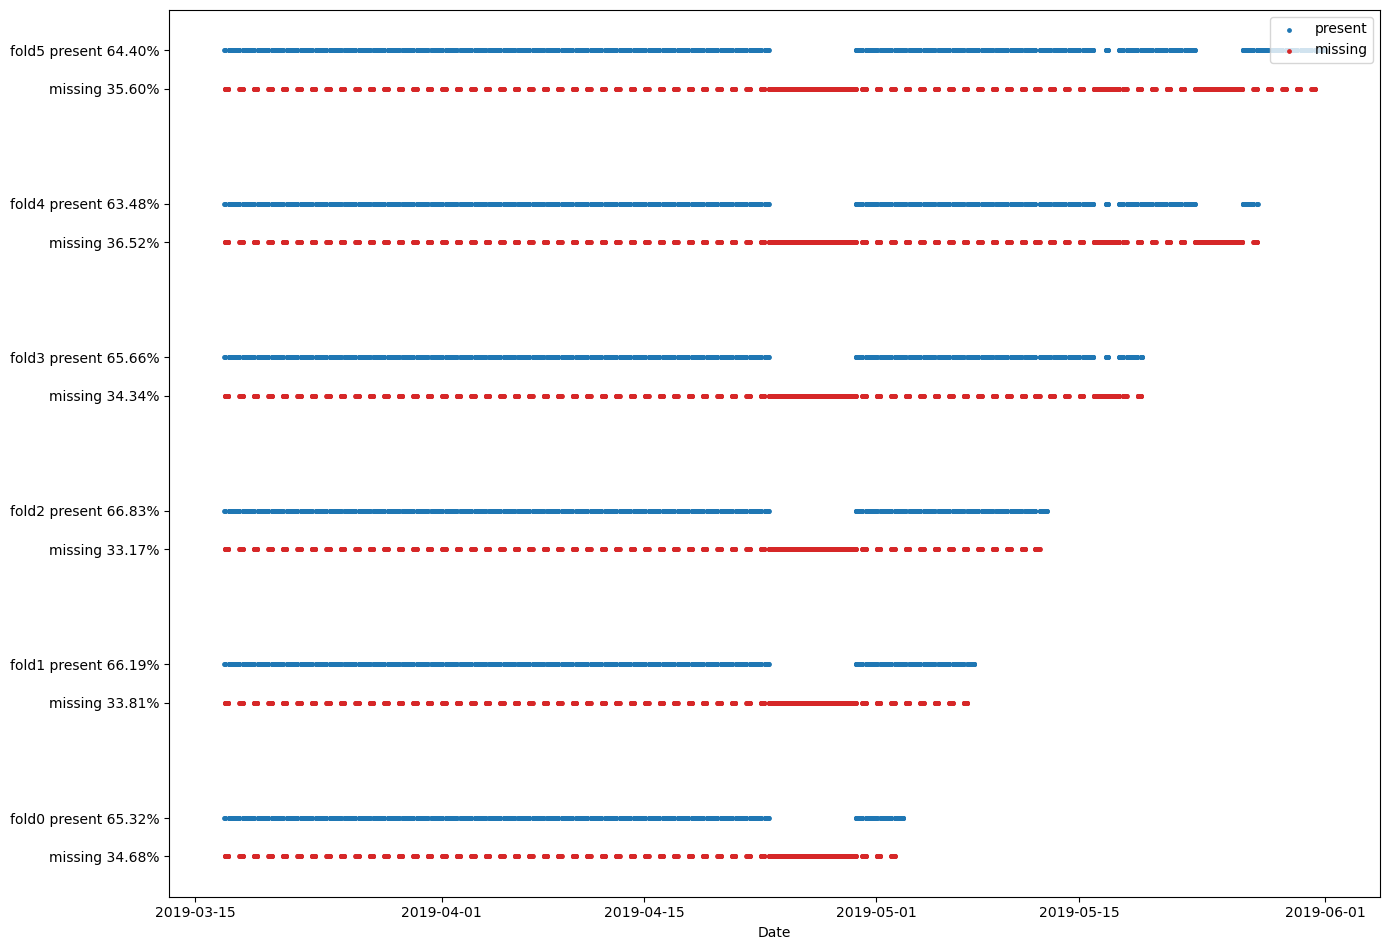

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_missing_dates_folds(K_subway_ds, freq='15T'):
    """
    Affiche, pour chaque fold, les instants présents et manquants sur un seul graphique.
    Axe vertical : fold0 present, fold0 missing, fold1 present, fold1 missing, …
    """
    fig, ax = plt.subplots(figsize=(14, 1.6 * len(K_subway_ds)))
    y_ticks, y_labels = [], []

    for i, subway_ds in enumerate(K_subway_ds):
        # Extraction des timestamps de chaque split
        s_train = pd.to_datetime(subway_ds.tensor_limits_keeper.df_verif_train.iloc[:, -1])
        s_valid = pd.to_datetime(subway_ds.tensor_limits_keeper.df_verif_valid.iloc[:, -1])
        s_test  = pd.to_datetime(subway_ds.tensor_limits_keeper.df_verif_test.iloc[:,  -1])

        serie = pd.concat([s_train, s_valid, s_test]).dropna().sort_values()

        if serie.empty:
            continue  # sécurité si un fold est vide

        full_index = pd.date_range(start=serie.min(), end=serie.max(), freq=freq)
        present_mask = full_index.isin(serie)

        y_missing= 4 * i
        y_present= 4 * i + 1
        y_ticks.extend([y_present, y_missing])
        y_labels.extend([f"fold{i} present {'{:.2%}'.format(len(serie)/len(full_index))}", f"missing {'{:.2%}'.format(1-len(serie)/len(full_index))}"])

        ax.scatter(full_index[present_mask], [y_present] * present_mask.sum(),
                   c='tab:blue', s=6, label=f"present" if i == 0 else None)
        ax.scatter(full_index[~present_mask], [y_missing] * (~present_mask).sum(),
                   c='tab:red', s=6, label=f"missing" if i == 0 else None)

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Date')
    ax.legend(loc='upper right', markerscale=1)
    plt.tight_layout()
    plt.show()

plot_missing_dates_folds(K_subway_ds, freq='15T')

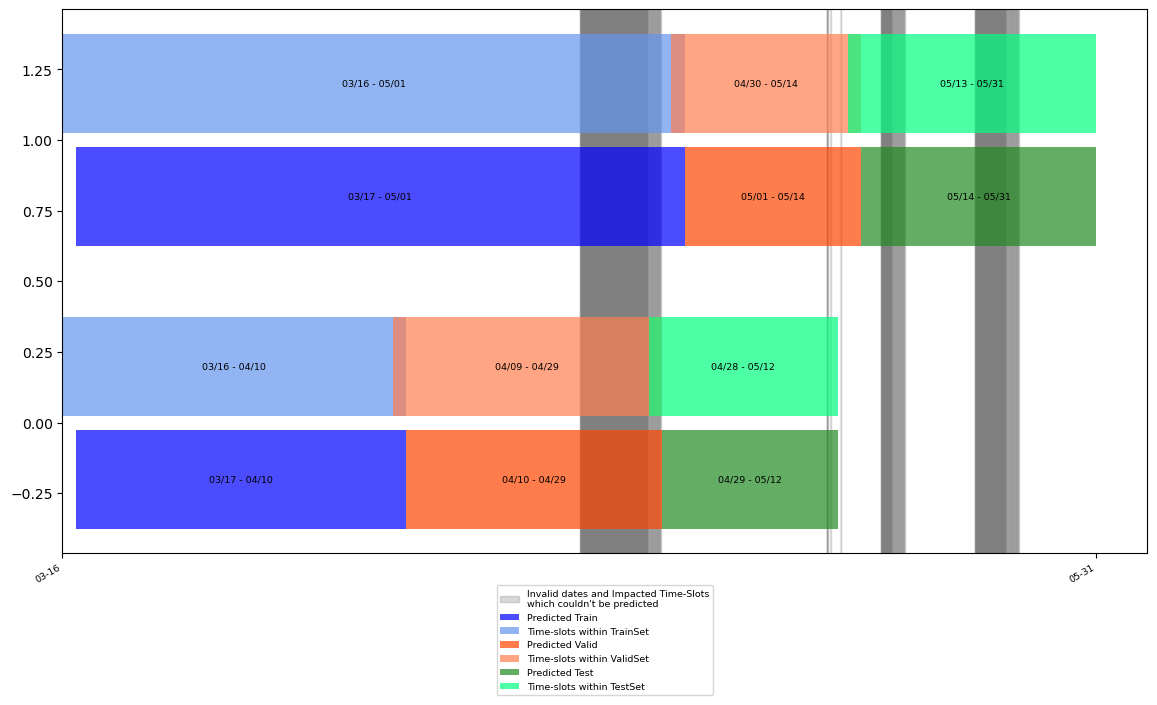

In [15]:
from plotting.plotting import plot_k_fold_split
plot_k_fold_split(K_subway_ds,K_subway_ds[0].init_invalid_dates,figsize=(14,8),save_path = '../save/plot/2_fold_split.pdf')

In [10]:
os.listdir(os.path.expanduser('../save/plot/'))

['example_multi_layers.html',
 'IRIS_station_i.html',
 'IRIS.html',
 'MAE_distribution_on_SUBWAY_OUT_per_fold.html',
 'MAE_distribution_per_app_and_per_fold.html',
 'MAPE_distribution_per_app_and_per_fold.html',
 'MASE_distribution_per_app_and_per_fold.html',
 'MSE_distribution_per_app_and_per_fold.html',
 'station_map_with_bokeh.html',
 'training_stability_mean_std_validation.html',
 '16_03_2019_31_05_2029_station_map_with_bokeh.html']

## Train on the K-1 folds:

In [16]:
trial_id = 'subway_in_calendar_netmob_POIs_STAEformer_HuberLossLoss_2025_06_11_21_33_4901'
args,_ = load_configuration(trial_id,load_config=True)
folds =  list(np.arange(args.K_fold))
K_fold_splitter = KFoldSplitter(args,folds)
K_subway_ds,args = K_fold_splitter.split_k_fold()

## Split the dataset already used for HP tuning and the others: 
ds_tuning = K_subway_ds[0]
ds_validation = K_subway_ds[1:]

## K-fold validation:
valid_losses = []
for fold,ds in enumerate(ds_validation):
    model = full_model(ds, args).to(args.device)
    optimizer,scheduler,loss_function = load_optimizer_and_scheduler(model,args)
    trainer = Trainer(ds,model,args,optimizer,loss_function,scheduler = scheduler,show_figure = False,trial_id = trial_id, fold=0)
    trainer.train_and_valid(normalizer = ds.normalizer, mod = 1000,mod_plot = None) 
    valid_losses.append(trainer.performance['valid_loss'])

## Save Model: 
if False:
    row = {f"fold{k}": [loss] for k,loss in enumerate(valid_losses)}
    row.update({'mean' : [np.mean(valid_losses)]})
    df_results = pd.DataFrame.from_dict(row)
    df_results.to_csv(f"{SAVE_DIRECTORY}/{save_folder}/VALID_{trial_id}.csv")


>>>> Load best CONFIG
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 860])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'compute_node_attr_with_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['Deezer', 'Google_Maps'], 'NetMob_transfer

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 1     Train Loss: 277.4002420047193 Val Loss: 117.0522017783307
epoch: 1 
 min\epoch : 0.02
Estimated time for training: 9.8min 
Epoch: 3     Train Loss: 76.2338582797015 Val Loss: 107.24433541805186
Epoch: 56     Train Loss: 25.498766420411066 Val Loss: 30.548246286270466
Epoch: 112     Train Loss: 23.625290691704564 Val Loss: 28.206124666903882
Epoch: 167     Train Loss: 22.961478848032765 Val Loss: 27.458827022795983
Epoch: 223     Train Loss: 22.63186373445065 Val Loss: 27.199834279811128
Epoch: 278     Train Loss: 22.536769197781318 Val Loss: 27.100553041823368
Epoch: 334     Train Loss: 22.498534209680034 Val Loss: 27.019203794763442
Epoch: 389     Train Loss: 22.461853166724318 Val Loss: 27.00389513056329
Epoch: 445     Train Loss: 22.45287589377315 Val Loss: 27.002329952158828
Epoch: 500     Train Loss: 22.457172387709385 Val Loss: 27.007735329485953

Training Throughput:3314.75 sequences per seconds
>>> Training complete in: 0:09:04.218369
>>> Training (59.94%) performa

{'model_name': 'STAEformer',
 'dataset_names': ['subway_in', 'calendar', 'netmob_POIs'],
 'dataset_for_coverage': ['subway_in', 'netmob_POIs'],
 'calendar_types': ['dayofweek', 'timeofday'],
 'embedding_calendar_types': ['dayofweek', 'hour', 'minute'],
 'device': device(type='cuda'),
 'optimizer': 'adamw',
 'single_station': False,
 'loss_function_type': 'HuberLoss',
 'epsilon_clustering': 0.05,
 'freq': '15min',
 'minmaxnorm': True,
 'standardize': False,
 'learnable_adj_matrix': False,
 'contextual_positions': {'calendar_dayofweek': 0,
  'calendar_timeofday': 1,
  'netmob_POIs': 2},
 'quick_vision': False,
 'evaluate_complete_ds': True,
 'train_valid_test_split_method': 'similar_length_method',
 'set_spatial_units': None,
 'hp_tuning_on_first_fold': True,
 'keep_best_weights': False,
 'num_workers': 0,
 'persistent_workers': False,
 'pin_memory': True,
 'prefetch_factor': 2,
 'drop_last': False,
 'mixed_precision': True,
 'non_blocking': True,
 'torch_compile': False,
 'backend': 'in

In [21]:
trainer.performance['test_metrics']['rmse_all'],trainer.performance['test_metrics']['mae_all'],trainer.performance['test_metrics']['mse_all'],

(41.33493518829346, 23.92946147918701, 1712.2852783203125)

In [24]:
modification = { 'target_data': 'subway_in',
    'dataset_names': ['subway_in', 'calendar', 'netmob_POIs'],
 'dataset_for_coverage': ['subway_in', 'netmob_POIs'],
 'calendar_types': ['dayofweek', 'timeofday'],
 'embedding_calendar_types': ['dayofweek', 'hour', 'minute'],
 'optimizer': 'adamw',
 'loss_function_type': 'HuberLoss',
 'freq': '15min',
 'minmaxnorm': True,
 'standardize': False,
 'learnable_adj_matrix': False,

 'quick_vision': False,
 'evaluate_complete_ds': True,
 'train_valid_test_split_method': 'similar_length_method',
 'set_spatial_units': None,
 'hp_tuning_on_first_fold': True,
 'keep_best_weights': False,
 'num_workers': 0,
 'persistent_workers': False,
 'pin_memory': True,
 'prefetch_factor': 2,
 'drop_last': False,
 'mixed_precision': True,
 'non_blocking': True,
 'torch_compile': 'compile',#False,
 'backend': 'inductor',
 'prefetch_all': False,

 'denoising_names': ['netmob_POIs'],
 'denoiser_names': ['exponential'],
 'denoising_modes': ['train', 'valid', 'test'],
 'denoiser_kwargs': {'exponential': {'alpha': 0.8}},

 'contextual_kwargs': {'netmob_POIs': {'compute_node_attr_with_attn': True,
                        'stacked_contextual': True,
                        'NetMob_selected_apps': ['Deezer', 'Google_Maps'],
                        'NetMob_transfer_mode': ['DL'],
                        'NetMob_selected_tags': ['iris'],
                        'NetMob_expanded': '',
                        'NetMob_only_epsilon': False,
                        'vision_model_name': None,
                        'use_only_for_common_dates': False,
                        'attn_kwargs': {'latent_dim': 2,
                            'dim_feedforward': 64,
                            'num_heads': 2,
                            'dim_model': 64},   
                        },
 },
 'ray': False,
 'data_augmentation': False,
 'H': 6,
 'W': 0,
 'D': 1,
 'step_ahead': 4,
 'horizon_step': 1,
 'L': 7,
 'shuffle': True,
 'train_prop': 0.6,
 'calib_prop': None,
 'valid_prop': 0.2,
 'test_prop': 0.19999999999999996,
 'track_pi': False,
 'validation_split_method': 'forward_chaining_cv',
 'min_fold_size_proportion': 0.75,
 'no_common_dates_between_set': False,
 'K_fold': 2,
 'current_fold': 0,
 'metrics': ['rmse', 'mse', 'mae', 'mape', 'mase'],
 'abs_path': '/home/rrochas/prediction-validation/',
 'out_dim_factor': 1,
 'temporal_graph_transformer_encoder': False,


 'input_embedding_dim': 24,
 'tod_embedding_dim': 6,
 'dow_embedding_dim': 6,
 'spatial_embedding_dim': 0,
 'adaptive_embedding_dim': 32,
 'num_heads': 4,
 'num_layers': 3,
 'feed_forward_dim': 256,
 'use_mixed_proj': True,

 'batch_size': 128,
   
      

  'weight_decay': 0.0019180662821482,  # 'weight_decay':  0.0015,
  'lr': 0.0009241967812616,               # 'lr': 0.001,
 'dropout': 0.05,          # 'dropout': 0.2,
 'epochs': 500,
 'scheduler': True,
 'torch_scheduler_milestone': 1, # 'torch_scheduler_milestone': 20,
 'torch_scheduler_gamma': 0.9816450698678711,     # 'torch_scheduler_gamma':0.9925,
 'torch_scheduler_lr_start_factor': 0.4123017434871985,    # 'torch_scheduler_lr_start_factor': 0.3,
 'torch_scheduler_type': 'warmup',     # 'torch_scheduler_type': 'warmup',


 'use_target_as_context': False,
 'compute_node_attr_with_attn': False,
 }

from examples.benchmark import local_get_args
dataset_for_coverage = ['subway_in','netmob_POIs'] 
model_name = 'STAEformer'
args_bis = local_get_args(model_name,
                    args_init = None,
                    dataset_names=modification['dataset_names'],
                    dataset_for_coverage=dataset_for_coverage,
                    modification =modification
                    )

folds =  list(np.arange(args_bis.K_fold))
K_fold_splitter = KFoldSplitter(args_bis,folds)
K_subway_ds_bis,args_bis = K_fold_splitter.split_k_fold()

## Split the dataset already used for HP tuning and the others: 
ds_tuning_bis = K_subway_ds_bis[0]
ds_validation_bis = K_subway_ds_bis[1:]

## K-fold validation:
valid_losses = []
for fold,ds in enumerate(ds_validation_bis):
    model = full_model(ds, args_bis).to(args_bis.device)
    optimizer,scheduler,loss_function = load_optimizer_and_scheduler(model,args_bis)
    trainer_bis = Trainer(ds,model,args_bis,optimizer,loss_function,scheduler = scheduler,show_figure = False,trial_id = trial_id, fold=0)
    trainer_bis.train_and_valid(normalizer = ds.normalizer, mod = 1000,mod_plot = None) 
    valid_losses.append(trainer_bis.performance['valid_loss'])

                    

----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 860])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'compute_node_attr_with_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['Deezer', 'Google_Maps'], 'NetMob_transfer_mode': ['DL'], 'NetMob

[2025-06-11 23:47:17,365] torch._inductor.utils: [WARNING] using triton random, expect difference from eager
[2025-06-11 23:48:00,715] torch._inductor.utils: [WARNING] using triton random, expect difference from eager
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 1     Train Loss: 268.9875767773117 Val Loss: 95.72047518466381
epoch: 1 
 min\epoch : 0.02
Estimated time for training: 6.8min 
Epoch: 3     Train Loss: 66.27678100975662 Val Loss: 78.42094025307513
Epoch: 56     Train Loss: 25.396255414001313 Val Loss: 35.163301273102455
Epoch: 112     Train Loss: 23.950648189732775 Val Loss: 32.096993361128135
Epoch: 167     Train Loss: 22.95079446760802 Val Loss: 29.324985601546917
Epoch: 223     Train Loss: 22.552518525247077 Val Loss: 29.100359174038502
Epoch: 278     Train Loss: 22.451212379940014 Val Loss: 28.837284201764046
Epoch: 334     Train Loss: 22.391536515754517 Val Loss: 28.77768724319783
Epoch: 389     Train Loss: 22.378598643854687 Val Loss: 28.732579665488384
Epoch: 445     Train Loss: 22.360953321521187 Val Loss: 28.724953525624375
Epoch: 500     Train Loss: 22.380219520089813 Val Loss: 28.724068426578604

Training Throughput:3087.90 sequences per seconds
>>> Training complete in: 0:10:38.939078
>>> Training (56.79%) perform

In [25]:
trainer.performance['test_metrics']['rmse_all'],trainer.performance['test_metrics']['mae_all'],trainer.performance['test_metrics']['mse_all'],

(41.33493518829346, 23.92946147918701, 1712.2852783203125)

## Check Number of predicted day in validation set: 

In [ ]:
for i in range(args.K_fold):
    dset = K_subway_ds[i]
    limits = dset.tensor_limits_keeper
    display(limits.df_verif_valid['t+0'].dt.date.value_counts())